In [1]:
import numpy as np
import matplotlib.pyplot as plt

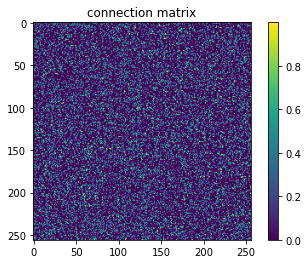

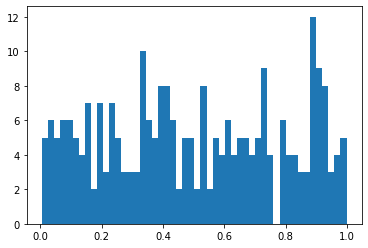

In [55]:
no_neurons = 256
sparsity = 0.7
M = (np.random.random((no_neurons,no_neurons))>sparsity).astype(np.float64)
M *= np.random.random((no_neurons,no_neurons))

A = np.arange(no_neurons**2).reshape(no_neurons,no_neurons)
x = (A//no_neurons)/no_neurons
y = (A%no_neurons)/no_neurons
#locality = 1.-np.abs(x-y)**0.2
#M *= locality

leackage = np.random.random(no_neurons)

plt.imshow(M)
plt.colorbar()
plt.title('connection matrix')
plt.show()

plt.hist(leackage,bins=50)
plt.show()

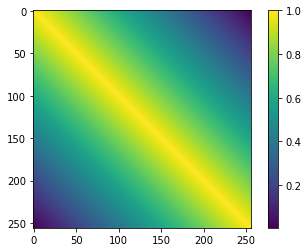

In [56]:
A = np.arange(no_neurons**2).reshape(no_neurons,no_neurons)
x = (A//no_neurons)/no_neurons
y = (A%no_neurons)/no_neurons
plt.imshow(1.-np.abs(x-y))
plt.colorbar()
plt.show()

In [61]:
a = 22
b = .0
def firing_function(V):
    sm = 1./(1+np.exp(-(V-a)*b))
    return np.random.random(V.shape)<sm

no_epochs = 400

voltage = np.zeros((no_epochs,no_neurons))
activity = np.zeros((no_epochs,no_neurons))
voltage[0] = np.random.random(no_neurons)
activity[0][5] = 1.


for i in range(1,no_epochs):
    voltage[i] = leackage*voltage[i-1]+M@activity[i-1]
    activity[i] = firing_function(voltage[i])

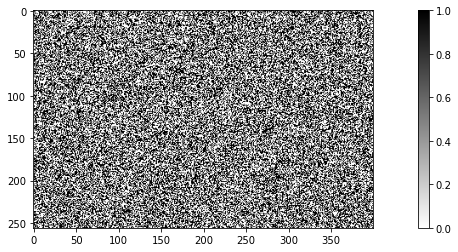

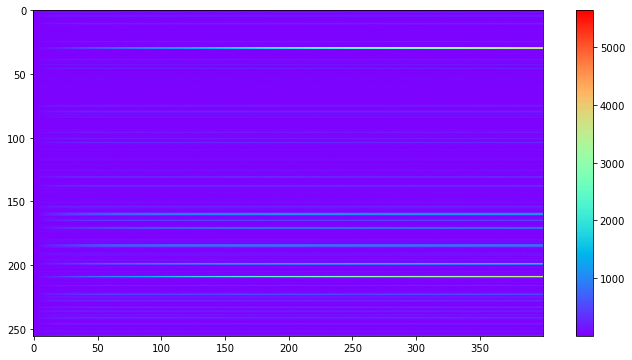

In [62]:
fig = plt.figure(figsize=(16,4))
plt.imshow(activity.T,cmap='gray_r')
plt.colorbar()
plt.show()

fig = plt.figure(figsize=(12,6))
plt.imshow(voltage.T,cmap='rainbow')
plt.colorbar()
plt.show()

In [63]:
import zlib

# takes in a array of 1s and 0s
# and creates a list of bytes
# that holds the info in bits
def array_to_bytes(np_array):
    no_bytes = np_array.size//8+1
    result = []
    for i in range(no_bytes):

        # splitting the sequence into 8 bit chunks
        slice = np_array[i*8:np.min([(i+1)*8,np_array.size])].astype(np.int)

        # padding the last byte if nescessary
        if slice.size < 8:
            slice = np.append(slice,(8-slice.size)*[False])

        result.append(int(''.join(slice.astype(str)),2))

    return bytes(result)

def computable_info_density(np_array):
    byte_array = array_to_bytes(np_array)
    comp = zlib.compress(byte_array)
    return len(comp)/len(byte_array)


In [64]:
A = activity[300:].flatten()
print(computable_info_density(A))

1.0034364261168385
